# Signature
------
Alexandre Dufresne-Nappert

20948586

# Exercise 1 
--------
An image $f$ is characterized by the probability density function (pdf) shown in Fig. 1. (The numbers inside the shaded boxes specify their respective areas. Assume the pdf is piecewise-constant within each box.)

## Question 1 
------
Design a 1-bit uniform scalar quantizer for this image on the support shown in Fig. 1. Specify the decision threshold(s) and representation levels.


In [194]:
def Quantizer(value:float):
    if (value > 0.5):
        return 0.75
    else:
        return 0.25

# Exercise 2 
------
Let $f$ be an image with intensities in $\{0,1,...,255\}$. Let $p_f(k)$ denote its normalized histogram (pmf), and

$$
F_f()k=\sum^k_{i=1}p_f(i)
$$

its cumulative distribution function (cdf). Assume intensity transformations are implemented via a monotone lookup table (LUT)
$$
g(x) =T(f(x))
$$

where $T : \{0, \dots, 255\} \rightarrow \{0, \dots, 255\}$ is non decreasing. 

## Question 2
-----
i) State a necessary and sufficient condition on the $LUT$ $T$ for the map ping $f → g$ to be invertible. 

ii) Is histogram equalization invertible in practice? Explain carefully. 

iii) Consider applying histogram equalization to an image $f$ to obtain $f_{eq}$, and then applying histogram equalization again to$f_{eq}$. Will the second equalization change the image? Explain. 

iv) (Small experiment) Apply histogram equalization to a test image (e.g., cameraman). Then construct an approximate inverse mapping using the empirical cdf of the equalized image and apply it. Compare the recovered image with the original. Report PSNR/SSIM and briefly comment on what you observe.
 

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, metrics

def equalization(image):
    
    # Get the Dimensions of the Image
    pixels = image.flatten()
    
    # Generate the Histogram using Numpy
    histogram, _ = np.histogram(pixels * 255, bins=256, range=(0, 256))
    
    # Create the Cumlative Distribution Function
    cdf = histogram.cumsum()
    cdf_normalized = cdf / cdf.max()
    
    # Create a Lookup Table to map the old pixel values to the CDF
    LUT = np.round(cdf_normalized * 255).astype('uint8')
    
    # Convert the image to the 8-bit pixel integer values
    img_int = np.round(image * 255).astype('uint8')
    
    # Convert the image using the Lookup Table
    img_equalized = LUT[img_int]
    
    #Return the nomarlized image again
    return img_equalized / 255.0

def PSNR (original_image, modified_image):
    # Get the max Image Value
    maxVal = np.max(original_image)
    
    # Get the Number of pixels contained in the image
    length = original_image.flatten().size
    
    # Calculate the Mean Square Error
    MSE = np.linalg.norm(original_image.flatten() - modified_image.flatten())
    
    #Return PSNR
    return 20*np.log10(np.sqrt(length)*maxVal/MSE)
    
def SSIM (original_image, modified_image):
    
    mu1 = np.average(original_image)
    mu2 = np.average(modified_image)
    
    sigma1 = np.std(original_image)
    sigma2 = np.std(modified_image)
    
    covariance = np.cov(original_image.flatten(), modified_image.flatten())[0, 1]
    
    C1 = 0.000001
    C2 = 0.000009
    
    return ((2*mu1*mu2+C1)*(2*covariance+C2))/((mu1**2 + mu2**2 + C1)*(sigma1**2 + sigma2**2 + C2))
    
# Create the Inverse Equalization function
def inverse_equalize(img_equalized, original_img):
    hist, bin_centers = exposure.histogram(original_img)
    cdf = hist.cumsum() / hist.sum()

    img_recovered = np.interp(img_equalized.flatten(), cdf, np.linspace(0, 1, 256))
    return img_recovered.reshape(img_equalized.shape)

[[4.07535563e-04 4.53671665e-04 4.22914264e-04 ... 3.61399462e-04
  3.46020761e-04 3.46020761e-04]
 [3.76778162e-04 4.07535563e-04 4.53671665e-04 ... 3.76778162e-04
  3.76778162e-04 3.76778162e-04]
 [3.46020761e-04 3.92156863e-04 4.38292964e-04 ... 3.61399462e-04
  3.46020761e-04 3.30642061e-04]
 ...
 [1.30718954e-04 2.30680507e-05 1.61476355e-04 ... 2.30680507e-05
  3.84467512e-05 9.99615532e-05]
 [1.76855056e-04 3.84467512e-05 2.84505959e-04 ... 1.15340254e-04
  7.68935025e-06 1.46097655e-04]
 [1.22260669e-03 1.26874279e-03 1.37639369e-03 ... 1.23798539e-03
  1.28412149e-03 1.23798539e-03]]
0.001945405613229867


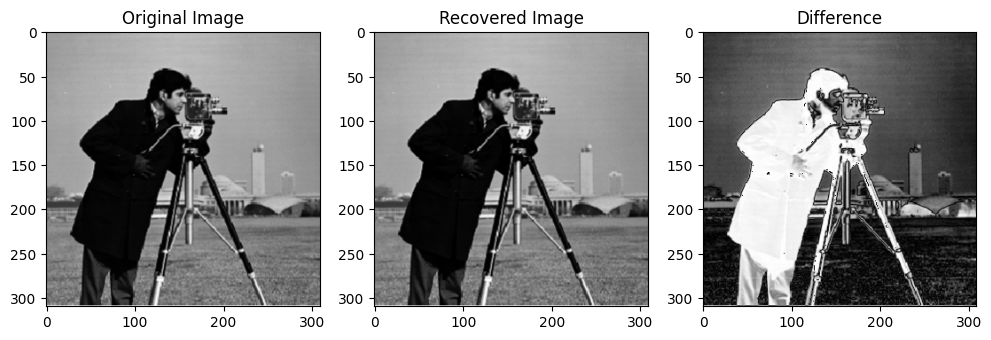

PSNR: 59.99 dB
SSIM: 0.9993
PSNR: 59.99 dB
SSIM: 1.0000


In [199]:
image = io.imread("Cameraman.png", as_gray=True)

eq_img = exposure.equalize_hist(image)

img_recovered = inverse_equalize(eq_img, image)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img_recovered, cmap="gray")
ax[1].set_title("Recovered Image")

diff = np.abs(image - img_recovered)
ax[2].imshow(diff, cmap="gray")
ax[2].set_title("Difference")

print(diff)
print(np.max(diff))


plt.show()

psnr_val = metrics.peak_signal_noise_ratio(image, img_recovered)
ssim_val = metrics.structural_similarity(image, img_recovered, data_range=1.0)

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

print(f"PSNR: {PSNR(image, img_recovered):.2f} dB")
print(f"SSIM: {SSIM(image, img_recovered):.4f}")

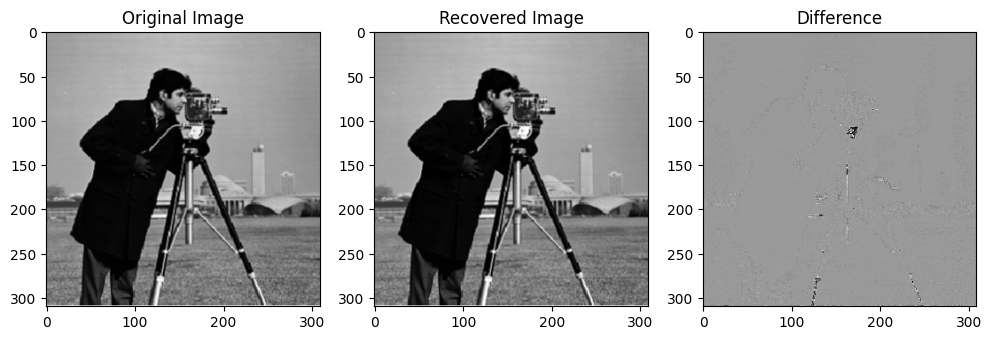

PSNR: 49.34 dB
SSIM: 0.9992
PSNR: 49.34 dB
SSIM: 0.9999


In [197]:
image = io.imread("Cameraman.png", as_gray=True)

eq_img = equalization(image)

img_recovered = inverse_equalize(eq_img, image)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(img_recovered, cmap="gray")
ax[1].set_title("Recovered Image")

diff = image - img_recovered
ax[2].imshow(diff, cmap="gray")
ax[2].set_title("Difference")

plt.show()

psnr_val = metrics.peak_signal_noise_ratio(image, img_recovered)
ssim_val = metrics.structural_similarity(image, img_recovered, data_range=1.0)

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

print(f"PSNR: {PSNR(image, img_recovered):.2f} dB")
print(f"SSIM: {SSIM(image, img_recovered):.4f}")


# Exercise 3
------
We consider the linear model
$$
\vec g = \mathbf{H}\cdot \vec f+\vec \varepsilon
$$

where $f$ is an $N\times M$ image, $\vec f = vec(f) \in \mathbb{R}^K, K=NM$ and $\mathbf{H}$ represents 2D convolution with a kernel $h$. The noise $\vec \varepsilon$ is non zero-mean white Gaussian.

In this exercise you will recover $f$ using optimization methods, without ever forming the $\mathbf{H}$ matrix explicitly

Data generation
- Load the image `Cameraman`
- Generate a blur kernel using `fspecial('gaussian', [7, 9], 1.5)`
- Form the blurred image using zero-padded convolution using function `conv2` :
$$g=h\cdot f$$
and retain the output of size $(N+6)\times(M+8)$ (i.e., “full” convolution).

- Add zero-mean Gaussian noise with standard deviation $\sigma = 5$

The resulting image $g$ is your observation


## Part A : Convolution as a Linear Operator and it's Adjoint
----
### Question 3
------
Verify numerically that for arbitrary images $\vec f$ and $\vec u$
$$
\langle \mathbf{H}\vec f, \vec u\rangle =\langle \vec f, \mathbf{H}^T \vec u\rangle
$$


In [ ]:
import numpy as np
from skimage import io
from scipy.signal import convolve2d

# Load the Cameraman Image
image = io.imread("Cameraman.png", as_gray=True)

# Create a Random Kernel
h = np.random.randn(7, 7)

# Convolute the Kernel and the Image
Hf = convolve2d(image, h, mode="full")

# Make the Output Image equal to u
u = Hf

# Flip the kernel and then convolute with output image
h_flipped = np.flip(h)
Htu = convolve2d(u, h_flipped, mode="valid")

# Compute the Dot Product on both sides
left_side = np.dot(Hf.flatten(), u.flatten())
right_side = np.dot(image.flatten(), Htu.flatten())

# Display the Results
print(f"Left Side:  {left_side}")
print(f"Right Side: {right_side}")
print(f"Difference: {abs(left_side - right_side)}")


Left Side:  1270062.2533303814
Right Side: 1270062.2533303814
Difference: 0.0
